# **คณันสักก์ สุจารีย์ 163404140001 วต.3-1**

In [ ]:
import cv2 as cv # import library opencv โดยย่อเป็น cv
import numpy as np # import library numpy โดยย่อเป็น np
import random # import library random 
from matplotlib import pyplot as plt # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt
from google.colab.patches import cv2_imshow # import library google.colab.patches ในส่วนย่อย cv2_imshow

In [ ]:
#ดาวน์โหลดไฟล์
!wget https://ddajb7q31joyp.cloudfront.net/eyJidWNrZXQiOiJwcmQtbGlmdWxsY29ubmVjdC1wcm9qZWN0cy1hZG1pbi1pbWFnZXMiLCJrZXkiOiIyOTQxYWE1YS03YWIzLTRjYjQtYjYyNS01NmI1YmE3NWY5M2IvMjk0MWFhNWEtN2FiMy00Y2I0LWI2MjUtNTZiNWJhNzVmOTNiXzEuMC1USC0wLVBKLTE4MzEzLTE5NDQ5OTEzNjQ2MTY3ZGI5YmU0ZmM1LTEtMTIwMC04MDAuanBnIiwiZWRpdHMiOnsicmVzaXplIjp7IndpZHRoIjo3NTAsImhlaWdodCI6NTc1LCJmaXQiOiJjb3ZlciJ9fX0=

The name is too long, 336 chars total.
Trying to shorten...
New name is eyJidWNrZXQiOiJwcmQtbGlmdWxsY29ubmVjdC1wcm9qZWN0cy1hZG1pbi1pbWFnZXMiLCJrZXkiOiIyOTQxYWE1YS03YWIzLTRjYjQtYjYyNS01NmI1YmE3NWY5M2IvMjk0MWFhNWEtN2FiMy00Y2I0LWI2MjUtNTZiNWJhNzVmOTNiXzEuMC1USC0wLVBKLTE4MzEzLTE5NDQ5OTEzNjQ2MTY3ZGI5YmU0ZmM1LTEt.
--2022-09-16 04:26:16--  https://ddajb7q31joyp.cloudfront.net/eyJidWNrZXQiOiJwcmQtbGlmdWxsY29ubmVjdC1wcm9qZWN0cy1hZG1pbi1pbWFnZXMiLCJrZXkiOiIyOTQxYWE1YS03YWIzLTRjYjQtYjYyNS01NmI1YmE3NWY5M2IvMjk0MWFhNWEtN2FiMy00Y2I0LWI2MjUtNTZiNWJhNzVmOTNiXzEuMC1USC0wLVBKLTE4MzEzLTE5NDQ5OTEzNjQ2MTY3ZGI5YmU0ZmM1LTEtMTIwMC04MDAuanBnIiwiZWRpdHMiOnsicmVzaXplIjp7IndpZHRoIjo3NTAsImhlaWdodCI6NTc1LCJmaXQiOiJjb3ZlciJ9fX0=
Resolving ddajb7q31joyp.cloudfront.net (ddajb7q31joyp.cloudfront.net)... 13.226.47.122, 13.226.47.183, 13.226.47.67, ...
Connecting to ddajb7q31joyp.cloudfront.net (ddajb7q31joyp.cloudfront.net)|13.226.47.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100317 (

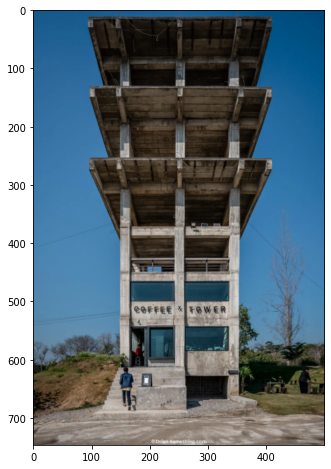

In [ ]:
original_img = cv.imread('tower.png') #อ่านไฟล์ img.png แล้วเก็บค่าในตัวแปร original_img
RGB_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB) #แปลงภาพเป็น BGR2RGB
plt.rcParams["figure.figsize"]=[14,8] #กำหนดขนาดภาพ 14x8
plt.imshow(RGB_img) #แสดงภาพ
plt.show()


## Sobel Edge Detector


In [ ]:
def sobelDetector(img, scale = 1, delta = 0, ddepth = cv.CV_16S):
    src = img.copy() #copy ภาพ
    src = cv.GaussianBlur(src, (3, 3), 0) #เบลอ
    gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY) #แปลงภาพ
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT) #แกน x
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT) #แกน Y
    abs_grad_x = cv.convertScaleAbs(grad_x) #
    abs_grad_y = cv.convertScaleAbs(grad_y) #
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0) #
    return grad,abs_grad_x,abs_grad_y


In [ ]:
sobel_img,sobel_x,sobel_y = sobelDetector(RGB_img)

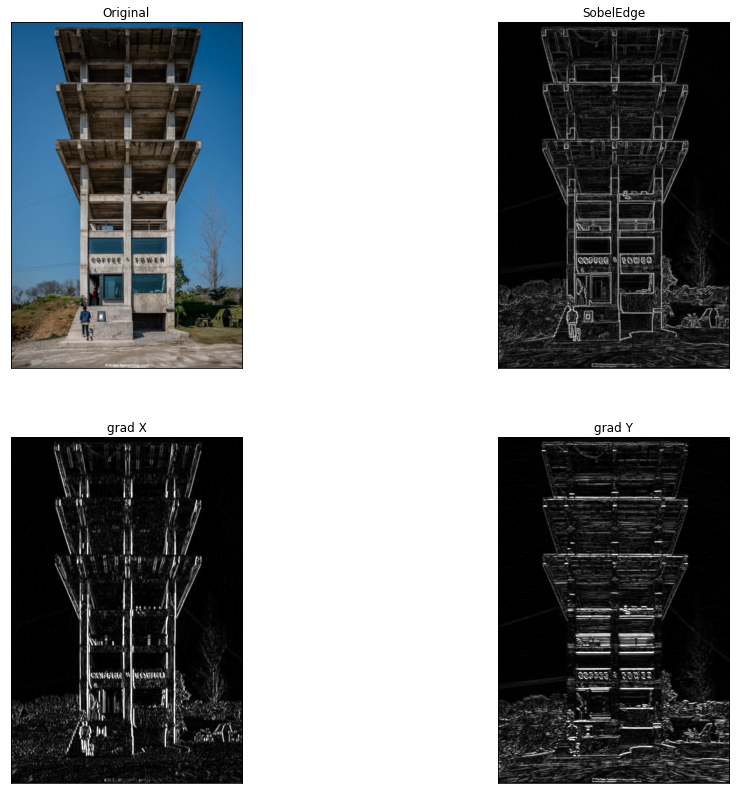

In [ ]:
plt.rcParams["figure.figsize"]=[16,14] #กำหนดขนาดภาพ 16x14
plt.subplot(221),plt.imshow(RGB_img),plt.title('Original') #แสดงภาพ RGB_img tilte ชื่อว่า Original
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sobel_img,cmap='gray'),plt.title('SobelEdge') #แสดงภาพ sobel_img tilte ชื่อว่า SobelEdge
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(sobel_x,cmap='gray'),plt.title('grad X') #แสดงภาพ sobel_x tilte ชื่อว่า grad X
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(sobel_y,cmap='gray'),plt.title('grad Y') #แสดงภาพ sobel_y tilte ชื่อว่า grad Y
plt.xticks([]), plt.yticks([])
plt.show()

SobelEdge แสดงภาพที่มีเส้นทั้งแกนแนวนอนและแนวตั้ง

grad X แสดงภาพที่มีเส้นแกนแนวตั้ง

grad Y แสดงภาพที่มีเส้นแกนแนวนอน




## Lapacian Edge Detector


In [ ]:
def laplaceDetector(img,kernel_size = 3,ddepth = cv.CV_16S):
    src = img.copy()
    src = cv.GaussianBlur(src, (3, 3), 0)
    src_gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
    dst = cv.Laplacian(src_gray, ddepth, ksize=kernel_size) #ใช้คำสั่ง Lapla
    abs_dst = cv.convertScaleAbs(dst)
    return abs_dst

In [ ]:
laplace_image = laplaceDetector(RGB_img,3)

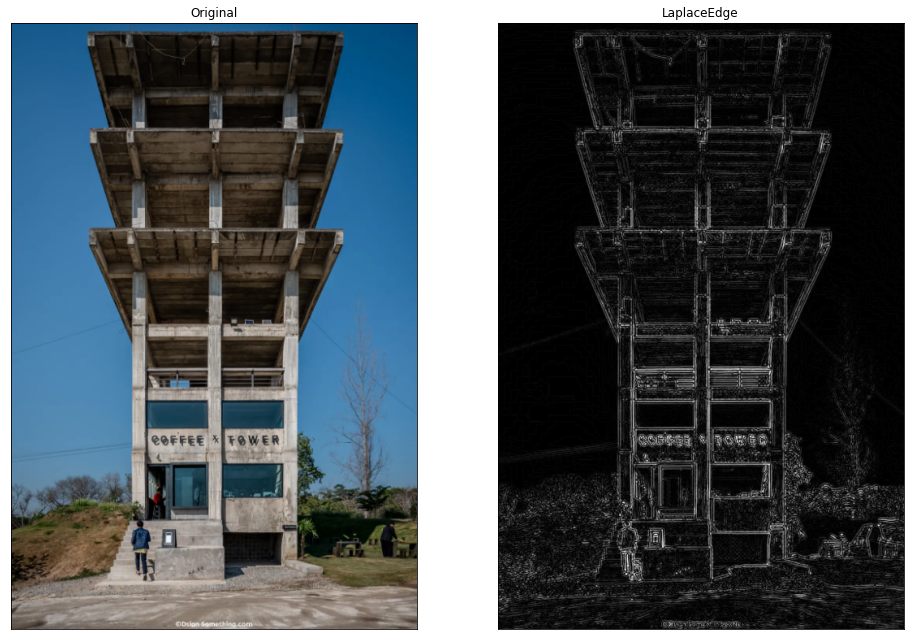

In [ ]:
plt.rcParams["figure.figsize"]=[16,14] #กำหนดขนาดภาพ 16x14
plt.subplot(121),plt.imshow(RGB_img),plt.title('Original') #แสดงภาพ RGB_img tilte ชื่อว่า Original
plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(laplace_image,cmap='gray'),plt.title('LaplaceEdge') #แสดงภาพ laplace_image tilte ชื่อว่า LaplaceEdge
plt.xticks([]), plt.yticks([])
plt.show()

LaplaceEdge เป็นฟังก์ชั่นที่ใช้ในการตรวจจับขอบ

## Canny Edge Detector


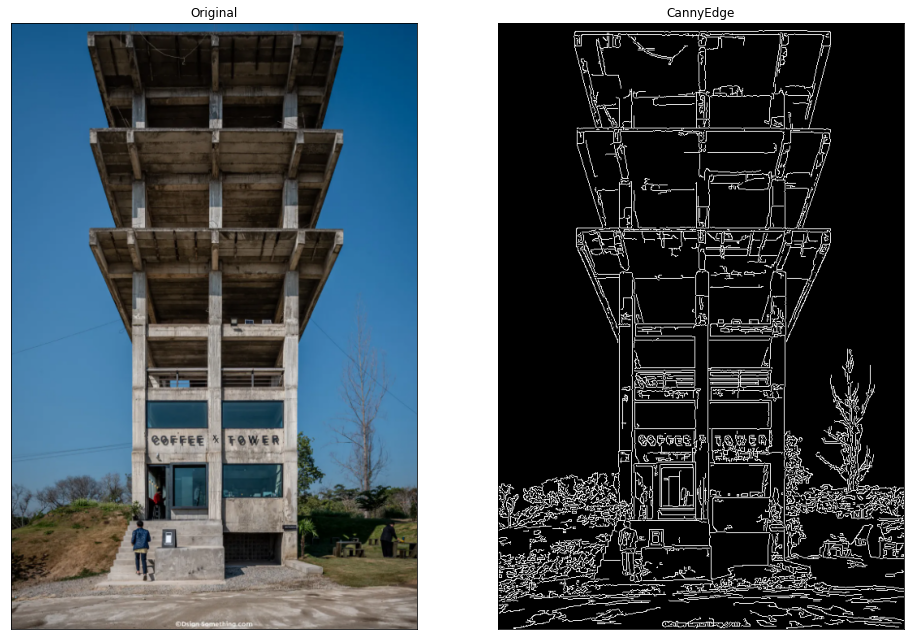

In [ ]:
canny_image = cv.Canny(RGB_img,50,200) #Lower threshold ,Upper threshold

plt.subplot(121),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_image,cmap='gray'),plt.title('CannyEdge')
plt.xticks([]), plt.yticks([])
plt.show()


CannyEdge เป็นฟังก์ชั่นที่ใช้ในการตรวจจับขอบ ที่เป็นที่รู้จักกันดีและเป็นตัวตรวจจับขอบที่ใช้มากที่สุด

## Edge Comparison


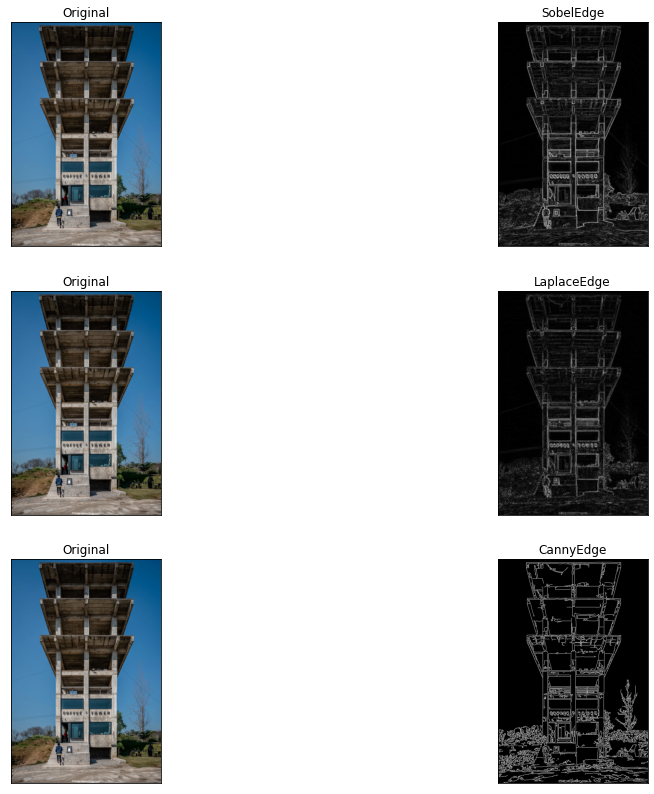

In [ ]:
#Sobel
plt.subplot(321),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(sobel_img,cmap='gray'),plt.title('SobelEdge')
plt.xticks([]), plt.yticks([])
#Laplacian
plt.subplot(323),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(laplace_image,cmap='gray'),plt.title('LaplaceEdge')
plt.xticks([]), plt.yticks([])
#Canny
plt.subplot(325),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(canny_image,cmap='gray'),plt.title('CannyEdge')
plt.xticks([]), plt.yticks([])
plt.show()

ทำการแสดงภาพทั้งหมด ที่ทำการใช้ฟังก์ชั่นการตรวจจับขอบ


1.   SobelEdge
2.   LaplaceEdge
3.   CannyEdge

เปรียบเทียบกับภาพต้นฉบับ

